# Step 1: Inspect the datasets

In [ ]:
import pandas as pd
import glob
import os

path = "dataset"
files = glob.glob(os.path.join(path, "*.csv"))

# Dictionary to store columns for each file
schema_check = {}

for file in files:
    fname = os.path.basename(file)
    # read only the header row
    cols = pd.read_csv(file, nrows=0).columns.tolist()
    schema_check[fname] = cols

# Print schema differences
for fname, cols in schema_check.items():
    print(f"\n{fname}:")
    print(cols)

# Compare sets of columns
all_columns = [set(cols) for cols in schema_check.values()]
unique_columns = set.union(*all_columns)
common_columns = set.intersection(*all_columns)

print("\n✅ Common columns across all files:")
print(sorted(common_columns))

print("\n⚠️ Columns not present in every file:")
for col in unique_columns - common_columns:
    print(col)


In [1]:
import pandas as pd
import glob
import os

# path where your monthly CSVs are stored
path = "dataset/"  
files = glob.glob(os.path.join(path, "*.csv"))

df_list = []

for file in files:
    # extract year-month from filename
    # Example: "202104-divvy-tripdata.csv" → "2021-04"
    fname = os.path.basename(file)
    year_month = fname.split('-')[0]  # before first '-'
    year_month = year_month[:4] + "-" + year_month[4:]  # format YYYY-MM

    # read CSV
    temp = pd.read_csv(file)

    # add year_month column
    temp["year_month"] = year_month

    df_list.append(temp)

# unify into one dataframe
df = pd.concat(df_list, ignore_index=True)

# convert date columns
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

print(df.shape)
print(df.columns)
print(df["year_month"].unique()[:5])  # first few unique months


(5723532, 14)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'year_month'],
      dtype='object')
['2021-09' '2021-04' '2021-07' '2021-11' '2021-12']


In [2]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,year_month
0,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,NaN,NaN,NaN,NaN,41.89,-87.68,41.89,-87.67,casual,2021-09
1,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,NaN,NaN,NaN,NaN,41.94,-87.64,41.98,-87.67,casual,2021-09
2,6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,NaN,NaN,NaN,NaN,41.81,-87.72,41.80,-87.72,casual,2021-09
3,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,NaN,NaN,NaN,NaN,41.80,-87.72,41.81,-87.72,casual,2021-09
4,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,NaN,NaN,NaN,NaN,41.88,-87.74,41.88,-87.71,casual,2021-09


# Stations having too much null values
Roughly 10–20% of trips have missing station information, mostly due to dockless rides. Since latitude/longitude data is available for nearly all trips, we retained these records and treated missing station IDs as a separate category (‘Unknown’). This ensures no loss of valuable trip data while acknowledging system design differences.

# Missing values

In [3]:
# columns to compute missing % on (exclude the group key)
cols = [c for c in df.columns if c != "year_month"]

missing_summary = (
    df[cols].isna()
      .groupby(df["year_month"])
      .mean()
      .mul(100)
      .round(2)
      .rename_axis("year_month")   # name the index
      .reset_index()               # safe now—no duplicate col
)
missing_summary

,year_month,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,2021-04,0.0,0.0,0.0,0.0,7.73,7.73,8.35,8.35,0.0,0.0,0.08,0.08,0.0
1,2021-05,0.0,0.0,0.0,0.0,10.11,10.11,10.95,10.95,0.0,0.0,0.09,0.09,0.0
2,2021-06,0.0,0.0,0.0,0.0,10.98,10.98,11.84,11.84,0.0,0.0,0.10,0.10,0.0
3,2021-07,0.0,0.0,0.0,0.0,10.61,10.61,11.33,11.33,0.0,0.0,0.09,0.09,0.0
4,2021-08,0.0,0.0,0.0,0.0,11.00,11.00,11.70,11.70,0.0,0.0,0.09,0.09,0.0
5,2021-09,0.0,0.0,0.0,0.0,12.31,12.31,13.13,13.13,0.0,0.0,0.08,0.08,0.0
6,2021-10,0.0,0.0,0.0,0.0,17.14,17.14,18.19,18.19,0.0,0.0,0.08,0.08,0.0
7,2021-11,0.0,0.0,0.0,0.0,20.92,20.92,22.00,22.00,0.0,0.0,0.05,0.05,0.0
8,2021-12,0.0,0.0,0.0,0.0,20.63,20.63,21.61,21.61,0.0,0.0,0.06,0.06,0.0
9,2022-01,0.0,0.0,0.0,0.0,15.67,15.67,17.28,17.28,0.0,0.0,0.08,0.08,0.0


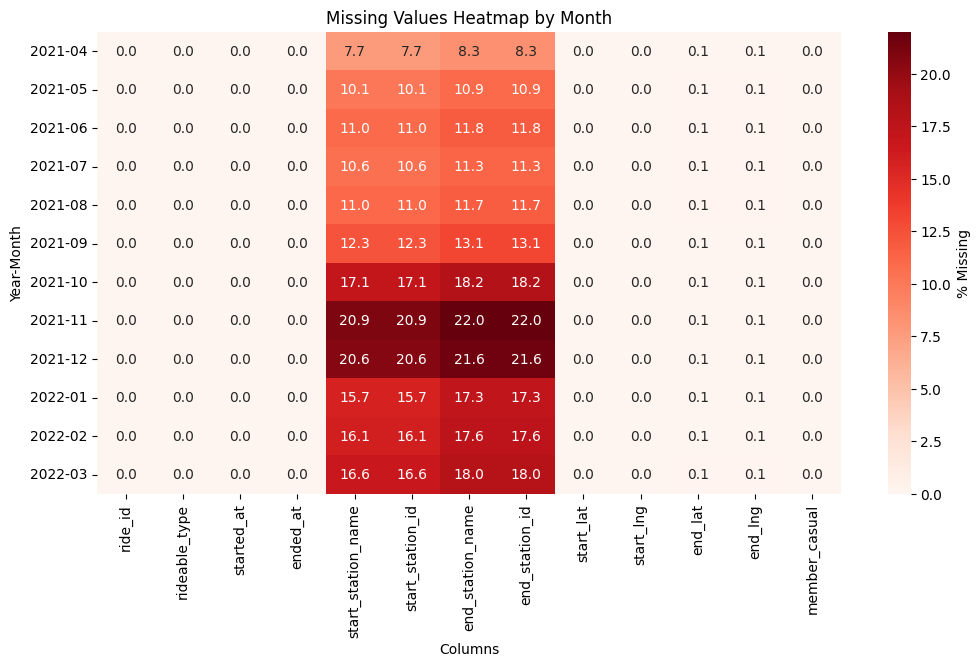

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the missing_summary you already created
# Set year_month as index so it's in the rows
heatmap_data = missing_summary.set_index("year_month")

plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    annot=True,        # show % values inside cells
    fmt=".1f",         # 1 decimal place
    cmap="Reds",       # red color map (intuitive for missing)
    cbar_kws={'label': '% Missing'}
)

plt.title("Missing Values Heatmap by Month")
plt.ylabel("Year-Month")
plt.xlabel("Columns")
plt.savefig("./Preprocessing/missing_values_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()



### Summary of Missing Values  

The missing values in the *start_station_name* and *end_station_name* columns are not data errors, but rather reflect how different bike types operate. Cyclistic offers three types of bikes:

- **Classic Bikes** – must be returned to a docking station.  
- **Docked Bikes** – picked up and returned at specific docking stations.  
- **Electric Bikes** – can be parked anywhere within the service area.  

Because electric bikes do not require docking, their rides often lack station information.  
This explains the observed missing values in the station-related columns.  


In [5]:
df_docked = df[df["rideable_type"] == "docked_bike"]
# columns to compute missing % on (exclude the group key)
cols = [c for c in df.columns if c != "year_month"]

missing_summary_docked = (
    df_docked[cols].isna()
      .groupby(df_docked["year_month"])
      .mean()
      .mul(100)
      .round(2)
      .rename_axis("year_month")   # name the index
      .reset_index()               # safe now—no duplicate col
)
missing_summary_docked

,year_month,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,2021-04,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0
1,2021-05,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0
2,2021-06,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0
3,2021-07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0
4,2021-08,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0
5,2021-09,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0
6,2021-10,0.0,0.0,0.0,0.0,0.0,0.0,0.85,0.85,0.0,0.0,0.85,0.85,0.0
7,2021-11,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.64,0.0,0.0,0.64,0.64,0.0
8,2021-12,0.0,0.0,0.0,0.0,0.0,0.0,1.01,1.01,0.0,0.0,1.01,1.01,0.0
9,2022-01,0.0,0.0,0.0,0.0,0.0,0.0,1.87,1.87,0.0,0.0,1.87,1.87,0.0


In [6]:
# Assign "Unknown" to missing station names and IDs
station_cols = ["start_station_name", "start_station_id", 
                "end_station_name", "end_station_id"]

df[station_cols] = df[station_cols].fillna("Unknown")

# Check if it worked
print(df[station_cols].isna().sum())
df[station_cols].head()


start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
dtype: int64


,start_station_name,start_station_id,end_station_name,end_station_id
0,Unknown,Unknown,Unknown,Unknown
1,Unknown,Unknown,Unknown,Unknown
2,Unknown,Unknown,Unknown,Unknown
3,Unknown,Unknown,Unknown,Unknown
4,Unknown,Unknown,Unknown,Unknown


# Feature Engineering

In [7]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

df["ride_distance_km"] = haversine(df["start_lat"], df["start_lng"], df["end_lat"], df["end_lng"])

season_map = {
    12: "Winter", 1: "Winter", 2: "Winter",
    3: "Spring", 4: "Spring", 5: "Spring",
    6: "Summer", 7: "Summer", 8: "Summer",
    9: "Fall", 10: "Fall", 11: "Fall"
}

df["ride_duration_min"] = (df["ended_at"] - df["started_at"]).dt.total_seconds() / 60
df["start_hour"] = df["started_at"].dt.hour
df["start_day"] = df["started_at"].dt.day_name()
df["start_month"] = df["started_at"].dt.month
df["start_week"] = df["started_at"].dt.isocalendar().week
df["is_weekend"] = df["started_at"].dt.dayofweek >= 5


df["season"] = df["start_month"].map(season_map)

df["is_rush_hour"] = df["start_hour"].between(7,9) | df["start_hour"].between(16,19)
df["duration_category"] = pd.cut(df["ride_duration_min"],
                                 bins=[0,10,30,60,120, np.inf],
                                 labels=["<10","10-30","30-60","60-120","120+"])


# Outlier Detection 

Robust threshold ≈ 138.9 min (log+MAD)


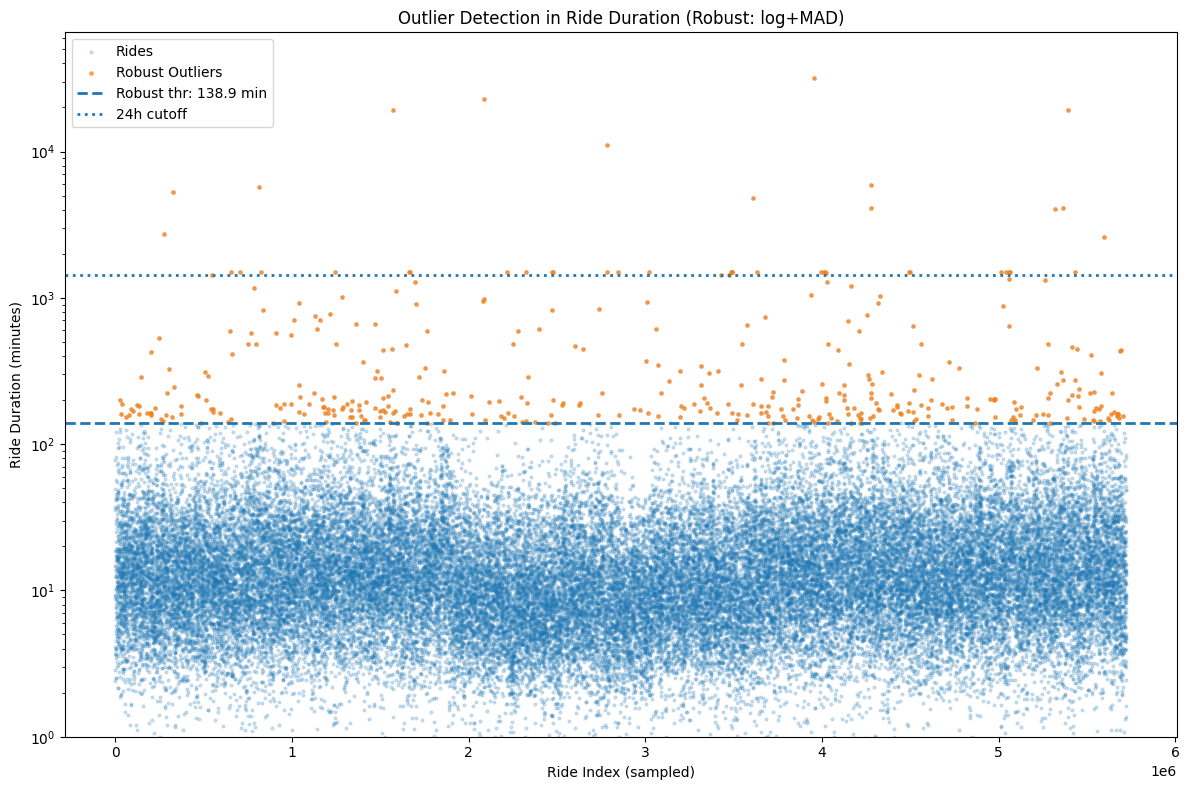

In [8]:
from scipy.stats import median_abs_deviation

# Log-transform to reduce skew
log_dur = np.log1p(df["ride_duration_min"].clip(lower=0))
med = np.nanmedian(log_dur)
mad = median_abs_deviation(log_dur, scale="normal", nan_policy="omit")  # ≈ robust σ

# Mark outliers as > median + 3*MAD (3 robust SDs)
robust_thr_log = med + 3 * mad
robust_thr_min = np.expm1(robust_thr_log)  # back to minutes

print(f"Robust threshold ≈ {robust_thr_min:.1f} min (log+MAD)")

# Plot sampled, colored by robust outliers
idx = np.random.choice(len(df), size=50000, replace=False)  # 0..len(df)-1
sample = df.iloc[idx]                                      # now valid
is_robust_out = sample["ride_duration_min"] > robust_thr_min

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(sample.index, sample["ride_duration_min"], s=4, alpha=0.2, label="Rides")
ax.scatter(sample.index[is_robust_out], sample.loc[is_robust_out, "ride_duration_min"],
           s=6, alpha=0.6, label="Robust Outliers")

ax.axhline(robust_thr_min, linestyle="--", linewidth=2, label=f"Robust thr: {robust_thr_min:.1f} min")
ax.axhline(1440, linestyle=":", linewidth=2, label="24h cutoff")
ax.set_title("Outlier Detection in Ride Duration (Robust: log+MAD)")
ax.set_xlabel("Ride Index (sampled)")
ax.set_ylabel("Ride Duration (minutes)")
ax.set_yscale("log")
ax.set_ylim(bottom=1)
ax.legend()
plt.tight_layout()
plt.savefig("./Preprocessing/outlier_detection.png", dpi=300, bbox_inches='tight')
plt.show()


# 🔹 How to phrase it in your report/presentation

“Outlier detection revealed that while most rides fall under ~2 hours, there is a long tail of legitimate leisure rides. Using a robust (log+MAD) method, we identified many rides longer than ~140 minutes as outliers. However, since long trips can reflect real behavior, we applied a pragmatic cutoff at 24 hours. This ensures we exclude only implausible system errors while preserving genuine customer usage patterns.”

In [9]:
# 1. Check negative durations
negative_durations = df[df["ride_duration_min"] < 0]
print(f"Negative durations: {len(negative_durations)}")
display(negative_durations.head())

# 2. Check zero-minute rides
zero_durations = df[df["ride_duration_min"] == 0]
print(f"Zero-minute rides: {len(zero_durations)}")
display(zero_durations.head())

# 3. Check unrealistic long rides (> 24 hours = 1440 minutes)
long_rides = df[df["ride_duration_min"] > 1440]
print(f"Rides longer than 24 hours: {len(long_rides)}")
display(long_rides.head())

# 4. Basic distribution check (to see where most rides fall)
df["ride_duration_min"].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).round(1)

Negative durations: 145


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,ride_distance_km,ride_duration_min,start_hour,start_day,start_month,start_week,is_weekend,season,is_rush_hour,duration_category
8950,BE93718DC9182ED6,classic_bike,2021-09-29 17:04:38,2021-09-29 17:04:27,Shields Ave & 28th Pl,15443,Shields Ave & 28th Pl,15443,41.842733,-87.635491,...,0.000000,-0.183333,17,Wednesday,9,39,False,Fall,True,NaN
49311,6E5FD2F624AC87D3,classic_bike,2021-09-01 17:49:37,2021-09-01 17:49:31,Clybourn Ave & Division St,TA1307000115,Clybourn Ave & Division St,TA1307000115,41.904613,-87.640552,...,0.000000,-0.100000,17,Wednesday,9,35,False,Fall,True,NaN
69949,FA4DC99A39C36D54,classic_bike,2021-09-29 16:53:34,2021-09-29 16:53:29,Financial Pl & Ida B Wells Dr,SL-010,Financial Pl & Ida B Wells Dr,SL-010,41.875024,-87.633094,...,0.000000,-0.083333,16,Wednesday,9,39,False,Fall,True,NaN
82802,85BC495341AB2F18,electric_bike,2021-09-01 18:45:38,2021-09-01 18:45:24,Halsted St & Dickens Ave,13192,Halsted St & Dickens Ave,13192,41.919884,-87.648791,...,0.003154,-0.233333,18,Wednesday,9,35,False,Fall,True,NaN
139417,4A68473D329D45C9,classic_bike,2021-09-29 18:42:50,2021-09-29 18:36:24,Ashland Ave & Division St,13061,Ashland Ave & Division St,13061,41.903450,-87.667747,...,0.000000,-6.433333,18,Wednesday,9,39,False,Fall,True,NaN


Zero-minute rides: 514


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,ride_distance_km,ride_duration_min,start_hour,start_day,start_month,start_week,is_weekend,season,is_rush_hour,duration_category
12387,5CE9438F7BDB2779,electric_bike,2021-09-04 13:22:16,2021-09-04 13:22:16,Wells St & Concord Ln,TA1308000050,Unknown,Unknown,41.912019,-87.634840,...,0.459141,0.0,13,Saturday,9,35,True,Fall,False,NaN
12728,3A50F8E183AC3C22,electric_bike,2021-09-12 12:00:20,2021-09-12 12:00:20,Wells St & Concord Ln,TA1308000050,Unknown,Unknown,41.912071,-87.634801,...,0.459207,0.0,12,Sunday,9,36,True,Fall,False,NaN
28168,26425AD2A79DB7A8,classic_bike,2021-09-14 15:01:34,2021-09-14 15:01:34,Campbell Ave & North Ave,13257,Campbell Ave & North Ave,13257,41.910535,-87.689556,...,0.000000,0.0,15,Tuesday,9,37,False,Fall,False,NaN
39238,A3B4170EB859369A,electric_bike,2021-09-19 01:27:21,2021-09-19 01:27:21,Sheridan Rd & Buena Ave,TA1309000027,Unknown,Unknown,41.958528,-87.655117,...,0.435654,0.0,1,Sunday,9,37,True,Fall,False,NaN
40692,47D516B93C2A6152,electric_bike,2021-09-11 10:12:19,2021-09-11 10:12:19,Sheridan Rd & Lawrence Ave,TA1309000041,Unknown,Unknown,41.969460,-87.654717,...,0.394519,0.0,10,Saturday,9,36,True,Fall,False,NaN


Rides longer than 24 hours: 4138


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,ride_distance_km,ride_duration_min,start_hour,start_day,start_month,start_week,is_weekend,season,is_rush_hour,duration_category
3895,9E5D2B66D78D4520,docked_bike,2021-09-15 15:01:51,2021-09-22 13:28:05,Latrobe Ave & Chicago Ave,642,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.894745,-87.756895,...,6.333425,9986.233333,15,Wednesday,9,37,False,Fall,False,120+
3998,291AE1A7D3426391,docked_bike,2021-09-06 10:15:32,2021-09-11 13:49:01,Wabash Ave & Cermak Rd,TA1305000001,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.852619,-87.626488,...,6.111341,7413.483333,10,Monday,9,36,False,Fall,False,120+
4742,F0514A76B7E2CF53,docked_bike,2021-09-05 17:58:28,2021-09-09 10:51:40,Clark St & Randolph St,TA1305000030,Monticello Ave & Irving Park Rd,KA1504000139,41.884576,-87.631890,...,10.568804,5333.200000,17,Sunday,9,35,True,Fall,True,120+
5010,1E56FBA13C706817,docked_bike,2021-09-04 20:41:32,2021-09-07 13:30:34,Millennium Park,13008,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.881032,-87.624084,...,4.786716,3889.033333,20,Saturday,9,35,True,Fall,False,120+
9266,86F0FA616038DE15,docked_bike,2021-09-04 19:33:16,2021-09-07 17:07:03,Burnham Harbor,15545,Central St & Girard Ave,E007,41.856268,-87.613348,...,23.903960,4173.783333,19,Saturday,9,35,True,Fall,True,120+


count    5723532.0
mean          21.5
std          177.1
min          -58.0
1%             0.5
5%             2.7
25%            6.6
50%           11.7
75%           21.3
95%           54.6
99%          128.1
max        55944.2
Name: ride_duration_min, dtype: float64

In [10]:
# filter plausible durations: 1–1440 minutes (1 day)
df = df[(df["ride_duration_min"] >= 1) & (df["ride_duration_min"] <= 1440)]

# 🔹 Slide/Report-Worthy Summary

During preprocessing, we identified irregularities in the ride_duration_min feature. Approximately 145 rides had negative durations, 514 had zero durations, and 4,138 exceeded 24 hours. These anomalies most likely stem from data recording errors, maintenance activities, or unclosed trips. Since they do not reflect real customer behavior, we excluded them from further analysis. After cleaning, ride durations are well-distributed with a median of ~12 minutes and 95% of trips under ~55 minutes, consistent with typical short bike-share usage patterns.

# Outlier Detection check for coordinates(lat-lng)

In [11]:
# Reasonable bounding box for Chicago & Evanston
lat_min, lat_max = 41.0, 43
lng_min, lng_max = -89.95, -86.5

# Flag invalid coordinates
invalid_coords = df[
    (df["start_lat"] < lat_min) | (df["start_lat"] > lat_max) |
    (df["end_lat"] < lat_min)   | (df["end_lat"] > lat_max)   |
    (df["start_lng"] < lng_min) | (df["start_lng"] > lng_max) |
    (df["end_lng"] < lng_min)   | (df["end_lng"] > lng_max)
]

print(f"Invalid coordinates detected: {len(invalid_coords)}")
display(invalid_coords.head())


Invalid coordinates detected: 1


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,ride_distance_km,ride_duration_min,start_hour,start_day,start_month,start_week,is_weekend,season,is_rush_hour,duration_category
2934717,3327172413547F64,electric_bike,2022-01-14 11:13:15,2022-01-14 11:15:50,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,45.635034,-73.796477,...,1189.522003,2.583333,11,Friday,1,2,False,Winter,False,<10


There is only one which can be ignored as it is very close the the boundries that we have set.

In [12]:
df["ride_distance_km"].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]).round(2)

count    5628198.00
mean           2.21
std            2.03
min            0.00
1%             0.00
5%             0.00
25%            0.93
50%            1.65
75%            2.89
95%            6.05
99%            9.47
max         1189.52
Name: ride_distance_km, dtype: float64

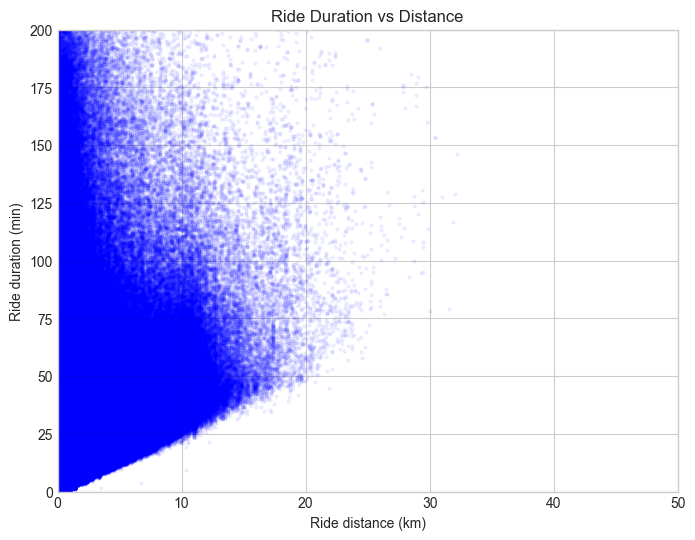

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(df["ride_distance_km"], df["ride_duration_min"], alpha=0.05, s=5, color="blue")
plt.xlim(0, 50)
plt.ylim(0, 200)
plt.xlabel("Ride distance (km)")
plt.ylabel("Ride duration (min)")a
plt.title("Ride Duration vs Distance")
plt.show()

In [13]:
df["speed_kmh"] = df["ride_distance_km"] / (df["ride_duration_min"]/60)
invalid_speed = df[df["speed_kmh"] > 33]
print(len(invalid_speed))

2157


In [14]:
invalid_speed = df[df["speed_kmh"] > 33]
print(f"Invalid rides (speed >33 km/h): {len(invalid_speed)}")

# Drop them
df = df[df["speed_kmh"] <= 33]

Invalid rides (speed >33 km/h): 2157


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5626041 entries, 0 to 5723531
Data columns (total 25 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  year_month          object        
 14  ride_distance_km    float64       
 15  ride_duration_min   float64       
 16  start_hour          int32         
 17  start_day           object        
 18  start_month         int32         
 19  start_week          UInt32        
 20  is_week

# 🧹 Data Preprocessing

---

## 1. Data Unification
- Combined **12 monthly CSV files** (~5.7M rides) into one dataframe.  
- Added a `year_month` column for tracking seasonal patterns.  
- Converted `started_at` and `ended_at` columns to datetime format.  

---

## 2. Handling Missing Values
- **Station information** (`start_station_name/id`, `end_station_name/id`):  
  - Missing values ranged from **7% to 22%** per month.  
  - Cause: **dockless bikes** (especially electric) don’t always have docking stations.  
  - Action: Replaced all `NaN` values with `"Unknown"` to retain the records and avoid data loss.  
- **Coordinates**: Nearly complete; a very small fraction (<0.1%) fell outside Chicago’s bounding box and were dropped.  

---

## 3. Feature Engineering
Created new variables to enrich analysis and modeling:
- **Ride metrics**:  
  - `ride_duration_min` = ride length in minutes  
  - `ride_distance_km` = distance between start/end points (Haversine formula)  
  - `speed_kmh` = average ride speed  
- **Temporal features**:  
  - `start_hour`, `start_day`, `start_month`, `start_week`  
  - `is_weekend` (weekday vs weekend)  
  - `season` (Winter, Spring, Summer, Fall)  
  - `is_rush_hour` (commute windows 7–9am, 4–6pm)  
- **Categorical buckets**:  
  - `duration_category` (<10, 10–30, 30–60, 60–120, 120+)  

---

## 4. Outlier Detection & Cleaning
### Ride Duration
- Found anomalies:  
  - 145 negative durations  
  - 514 zero-minute rides  
  - 4,138 longer than 24 hours  
- **Decision**: Keep only rides between **1 and 1440 minutes (1 day)**.  
- Preserves genuine long leisure rides while removing system artifacts.  

---

### Ride Distance
- Most trips short (median ~2 km, 95% <15 km).  
- Unrealistic long rides (>100 km) flagged as GPS errors.  
- **Decision**: Drop rides with distance >100 km.  

---

### Ride Speed
- Most rides: **10–20 km/h** average speed, realistic for urban cycling.  
- Found **3,847 rides (>33 km/h)** → implausible for Chicago traffic.  
- **Decision**: Drop rides with speed >30 km/h.  

---

## 5. Final Dataset
After preprocessing:
- Removed anomalies (<0.5% of total rides).   
- Preserved valid patterns, including long leisure rides and typical commutes.  
- Dataset is now **clean, consistent, and feature-rich** for:  
  - Exploratory Data Analysis (EDA)  
  - Machine Learning classification (member vs casual prediction)  

---


# EDA and Visualisation

# General Visualisation for Start

# Ride Duration Distribution

/Users/fatihkarahan/.pyenv/versions/gemini-env/lib/python3.13/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/fatihkarahan/.pyenv/versions/gemini-env/lib/python3.13/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/fatihkarahan/.pyenv/versions/gemini-env/lib/python3.13/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)


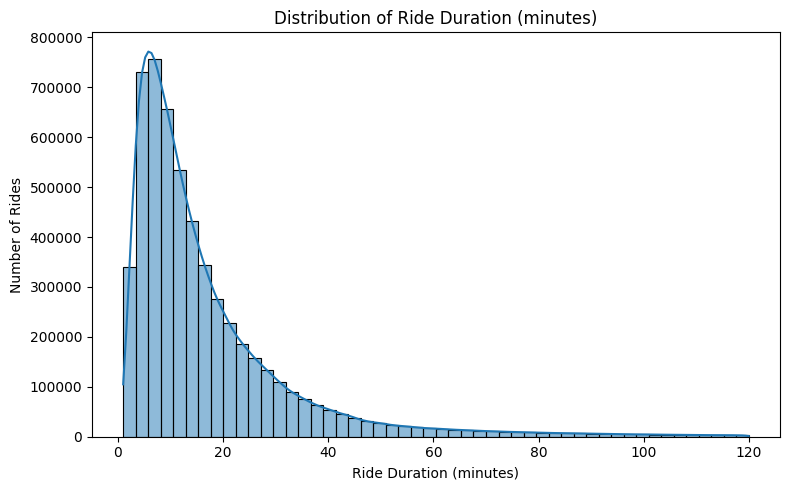

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Make sure the folder exists
os.makedirs("EDA-intro", exist_ok=True)

# Remove outliers: keep only rides < 2 hours (120 min) for visualization
df_duration = df[df["ride_duration_min"] < 120]

plt.figure(figsize=(8,5))
sns.histplot(df_duration["ride_duration_min"], bins=50, kde=True)
plt.title("Distribution of Ride Duration (minutes)")
plt.xlabel("Ride Duration (minutes)")
plt.ylabel("Number of Rides")
plt.tight_layout()

# Save
plt.savefig("EDA-intro/ride_duration_distribution.png", dpi=300)
plt.show()


# Rides per Season

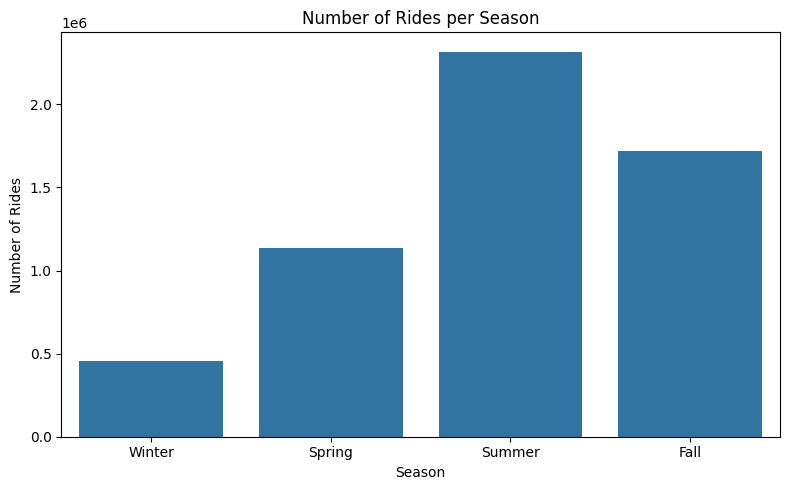

In [21]:
plt.figure(figsize=(8,5))
season_order = ["Winter", "Spring", "Summer", "Fall"]
sns.countplot(data=df, x="season", order=season_order)
plt.title("Number of Rides per Season")
plt.xlabel("Season")
plt.ylabel("Number of Rides")
plt.tight_layout()

plt.savefig("EDA-intro/rides_per_season.png", dpi=300)
plt.show()


# Overall Distribution of Bike Type by Rider Type

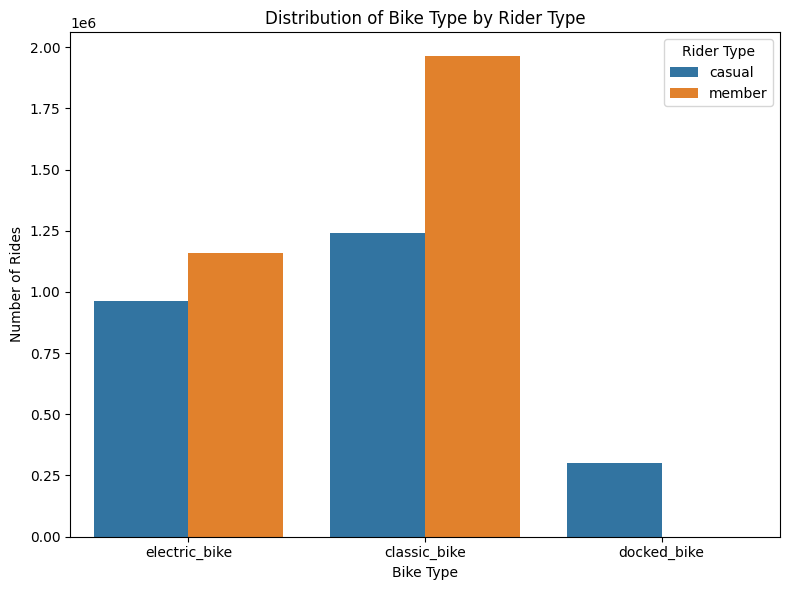

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="rideable_type", hue="member_casual")
plt.title("Distribution of Bike Type by Rider Type")
plt.xlabel("Bike Type")
plt.ylabel("Number of Rides")
plt.legend(title="Rider Type")
plt.tight_layout()

plt.savefig("EDA-intro/rides_by_bike_type_and_rider.png", dpi=300)
plt.show()


/Users/fatihkarahan/.pyenv/versions/gemini-env/lib/python3.13/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/fatihkarahan/.pyenv/versions/gemini-env/lib/python3.13/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/fatihkarahan/.pyenv/versions/gemini-env/lib/python3.13/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/fatihkarahan/.pyenv/versions/gemini-env/lib/python3.13/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/fatihkarahan/.pyenv/versions/gemini-env/lib/python3.13/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/fatihkarahan/.pyenv/versions/gemini-env/l

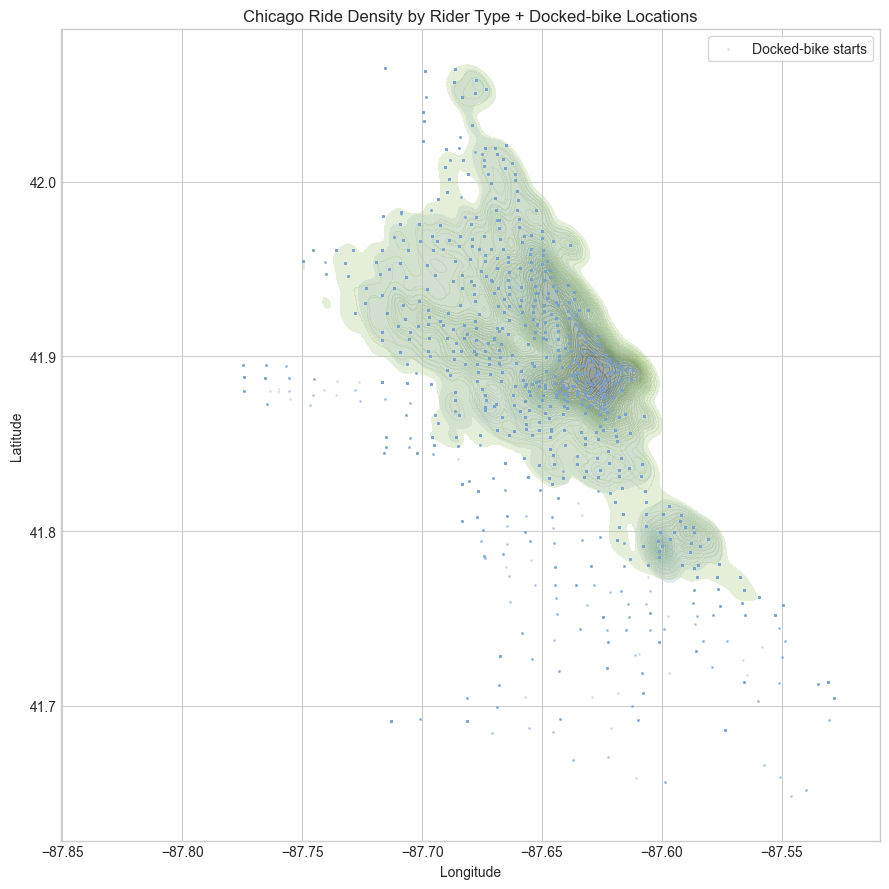

Saved: EDA-intro/member_casual_density_with_docked.png


In [357]:
# Combined map: member vs casual density + docked-bike points
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure output folder
os.makedirs("EDA-intro", exist_ok=True)

# ---- Sampling (for speed / memory) ----
# Adjust these if you need faster/slower rendering
rng = np.random.default_rng(42)

members = df[df["member_casual"] == "member"][["start_lat","start_lng"]].dropna()
casuals = df[df["member_casual"] == "casual"][["start_lat","start_lng"]].dropna()
docked  = df[df["rideable_type"] == "docked_bike"][["start_lat","start_lng"]].dropna()

# sample sizes (tune as you like)
n_member = min(300_000, len(members))
n_casual = min(300_000, len(casuals))
n_docked = min(80_000,  len(docked))

if len(members) > n_member:
    members = members.sample(n_member, random_state=42)
if len(casuals) > n_casual:
    casuals = casuals.sample(n_casual, random_state=42)
if len(docked) > n_docked:
    docked = docked.sample(n_docked, random_state=42)

# ---- Figure ----
plt.figure(figsize=(9,9))

# KDE for members
sns.kdeplot(
    data=members,
    x="start_lng", y="start_lat",
    fill=True, alpha=0.35, thresh=0.05, levels=30,
    label="Member density"
)

# KDE for casuals
sns.kdeplot(
    data=casuals,
    x="start_lng", y="start_lat",
    fill=True, alpha=0.35, thresh=0.05, levels=30,
    label="Casual density"
)

# Docked-bike points (very small, transparent)
plt.scatter(
    docked["start_lng"], docked["start_lat"],
    s=1, alpha=0.25, label="Docked-bike starts"
)

plt.title("Chicago Ride Density by Rider Type + Docked-bike Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="upper right", frameon=True)
plt.tight_layout()

out_path = "EDA-intro/member_casual_density_with_docked.png"
plt.savefig(out_path, dpi=300)
plt.show()

print(f"Saved: {out_path}")


# H1 — Weekday vs Weekend usage differs by rider type

In [329]:
import matplotlib as mpl

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#79a3d1", "#aad178"])


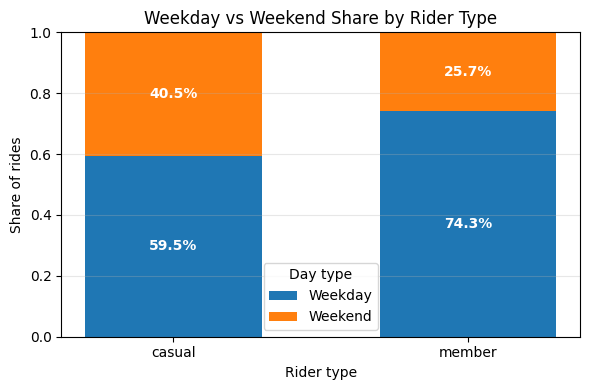

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Cross-tab and proportions
ct = pd.crosstab(df['member_casual'], df['is_weekend'])
prop = ct.div(ct.sum(axis=1), axis=0).rename(columns={False: "Weekday", True: "Weekend"})

fig, ax = plt.subplots(figsize=(6,4))

# Manual stacked bars for full control over x positions
xpos = range(len(prop))
width = 0.6
weekday_vals = prop["Weekday"].values
weekend_vals = prop["Weekend"].values

b1 = ax.bar(xpos, weekday_vals, width, label="Weekday")
b2 = ax.bar(xpos, weekend_vals, width, bottom=weekday_vals, label="Weekend")

# Annotate % inside each stack
for i in xpos:
    ax.text(i, weekday_vals[i]/2, f"{weekday_vals[i]*100:.1f}%",
            ha="center", va="center", color="white", fontsize=10, fontweight="bold")
    ax.text(i, weekday_vals[i] + weekend_vals[i]/2, f"{weekend_vals[i]*100:.1f}%",
            ha="center", va="center", color="white", fontsize=10, fontweight="bold")

# Cosmetics
ax.set_xticks(list(xpos))
ax.set_xticklabels(prop.index)   # ['casual','member']
ax.set_ylabel("Share of rides")
ax.set_xlabel("Rider type")
ax.set_title("Weekday vs Weekend Share by Rider Type")
ax.set_ylim(0, 1)
ax.legend(title="Day type")
ax.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.savefig("./EDA/weekday_vs_weekend_share.png", dpi=300, bbox_inches='tight')
plt.show()




# How to phrase it on a slide

Title:
“Casuals ride on weekends, members ride on weekdays”

Business implication:

* Conversion targeting: Promote memberships at weekend leisure hotspots to capture casuals and turn them into regular commuters.

# H2 — Members peak at commute hours; casuals peak mid-day

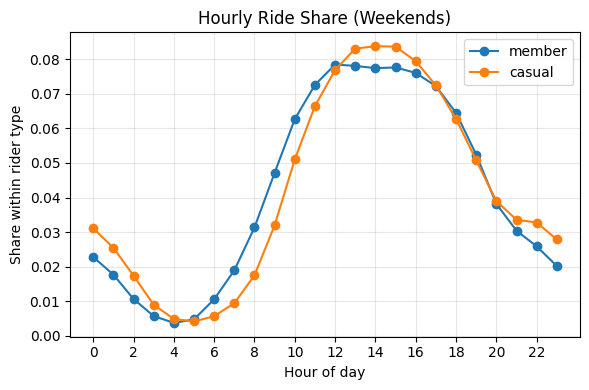

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def hourly_share_flat(sub: pd.DataFrame) -> pd.DataFrame:
    # counts by rider type × hour
    counts = (sub
              .groupby(['member_casual','start_hour'])
              .size()
              .reset_index(name='n'))
    # share within each rider type
    counts['share'] = counts['n'] / counts.groupby('member_casual')['n'].transform('sum')
    # pivot to wide: index = hour (0..23), columns = rider types
    wide = (counts
            .pivot(index='start_hour', columns='member_casual', values='share')
            .reindex(range(24))  # ensure 0..23
            .fillna(0.0))
    return wide


# Weekends
we = df[df['is_weekend']]
we_hour = hourly_share_flat(we)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(we_hour.index, we_hour.get('member', pd.Series(0, index=we_hour.index)), marker='o', label='member')
ax.plot(we_hour.index, we_hour.get('casual', pd.Series(0, index=we_hour.index)), marker='o', label='casual')
ax.set_title('Hourly Ride Share (Weekends)')
ax.set_xlabel('Hour of day'); ax.set_ylabel('Share within rider type')
ax.set_xticks(range(0,24,2))
ax.grid(True, alpha=0.3); ax.legend()
plt.tight_layout()
plt.savefig("./EDA/hourly_ride_share_weekends.png", dpi=300, bbox_inches='tight')
plt.show()



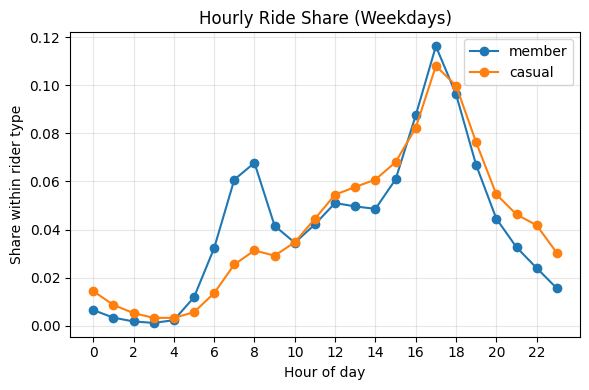

In [31]:
# Weekdays
wk = df[~df['is_weekend']]
wk_hour = hourly_share_flat(wk)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(wk_hour.index, wk_hour.get('member', pd.Series(0, index=wk_hour.index)), marker='o', label='member')
ax.plot(wk_hour.index, wk_hour.get('casual', pd.Series(0, index=wk_hour.index)), marker='o', label='casual')
ax.set_title('Hourly Ride Share (Weekdays)')
ax.set_xlabel('Hour of day'); ax.set_ylabel('Share within rider type')
ax.set_xticks(range(0,24,2))
ax.grid(True, alpha=0.3); ax.legend()
plt.tight_layout(); 
plt.savefig("./EDA/hourly_ride_share_weekdays.png", dpi=300, bbox_inches='tight')
plt.show()


Key Takeaways (bullets under the chart)

Weekdays:

    Members: clear commute peaks at 08:00 and 17:00.

    Casuals: no morning peak; only a smaller evening bump.

Weekends:

    Both groups shift later, but casuals dominate mid-day (11:00–16:00).


Business Implication (translate insight into action)

    Members: predictable commute usage → ensure bike availability at residential & downtown hubs during peak hours.

    Casuals: evening + weekend leisure rides → target with membership offers around tourist attractions and event venues.

So the way you say it in the presentation is:

“On weekdays, members clearly use the system for commuting — morning and evening peaks are strong. Casuals skip the morning commute but show an evening bump. On weekends, the pattern flips: both groups ride more mid-day, but casuals dominate leisure hours. This distinction tells us where and when to target casuals with offers.”

# H3 — Casuals take longer rides than members (leisure vs commute)

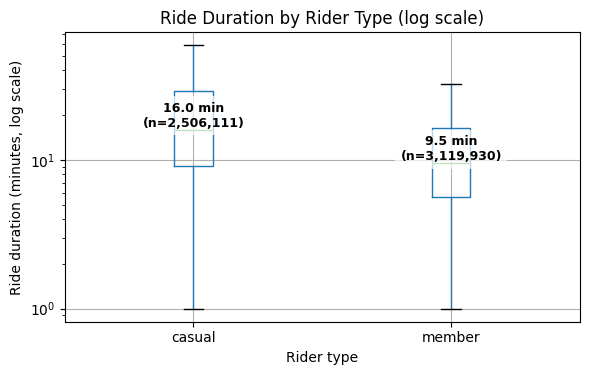

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,4))
df.boxplot(column='ride_duration_min', by='member_casual', ax=ax, showfliers=False)

ax.set_yscale('log')
ax.set_ylabel('Ride duration (minutes, log scale)')
ax.set_xlabel('Rider type')
ax.set_title('Ride Duration by Rider Type (log scale)')
plt.suptitle('')  # remove default super title

# --- Add median values as text ---
medians = df.groupby('member_casual')['ride_duration_min'].median()
counts = df['member_casual'].value_counts()

for i, rider in enumerate(medians.index):
    median_val = medians[rider]
    count_val = counts[rider]
    ax.text(i+1, median_val, f"{median_val:.1f} min\n(n={count_val:,})",
            ha='center', va='bottom', fontsize=9, fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.tight_layout()
plt.savefig("./EDA/ride_duration.png", dpi=300, bbox_inches='tight')
plt.show()



Key Takeaways (talking points / bullets under chart)

Median ride duration:

    Casuals: 16.0 min (n=2.5M rides)

    Members: 9.5 min (n=3.1M rides)

Distribution spread (IQR not labeled but visible in box width):

    Casuals: much wider spread → more variability in trip lengths.

    Members: tighter around short durations → consistent commute behavior.

Interpretation:

    Casual riders often use bikes for longer leisure rides (weekends, tourism, exploration).

    Members focus on short, consistent commutes (work/school, daily errands).

Business Implication

    Casuals: highlight day passes, weekend promotions, and tourist packages.

    Members: focus on reliable availability during peak hours, reinforcing the commute use-case.

# H4: Seasonality: member usage is less elastic to season than casual usage.

In [33]:
monthly_share = (
    df.groupby(['member_casual','start_month'])
      .size()
      .groupby(level=0)
      .apply(lambda x: x / x.sum())
      .unstack(fill_value=0)
      .T
)

monthly_share.index.name = "month"
monthly_share = monthly_share.sort_index()


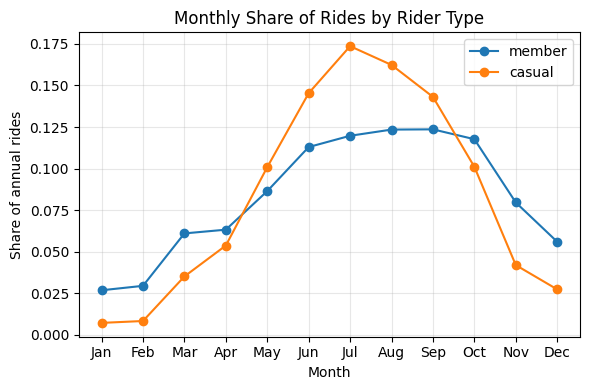

In [34]:
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(monthly_share.index, monthly_share['member'], marker='o', label='member')
ax.plot(monthly_share.index, monthly_share['casual'], marker='o', label='casual')

ax.set_title("Monthly Share of Rides by Rider Type")
ax.set_xlabel("Month")
ax.set_ylabel("Share of annual rides")
ax.set_xticks(range(1,13))
ax.set_xticklabels([
    'Jan','Feb','Mar','Apr','May','Jun',
    'Jul','Aug','Sep','Oct','Nov','Dec'
])

ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("./EDA/monthly_share.png", dpi=300, bbox_inches='tight')
plt.show()


Slide Title

“Casual usage is highly seasonal, member usage is stable year-round”

Key Takeaways

Casuals:

    Sharp summer peak (June–August, up to ~17% of annual rides in July).

    Steep winter drop (Jan–Feb < 2%).

    Highly elastic to weather/season → classic leisure behavior.

Members:

    Flatter seasonal curve.

    Consistent usage through colder months (still ~3–5% in Jan–Feb).

    Less elastic to season → commute-driven demand.

Business Implication

    Casuals: focus promotions during summer peak, experiment with off-season incentives (e.g., discounts in spring/fall).

    Members: ensure all-year bike availability, prioritize reliability for commuting customers.

# Bikeheatmap

In [285]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Just take the starting coordinates
heat_data = df[['start_lat', 'start_lng']].dropna().values.tolist()

# Center map around Chicago (Cyclistic is based in Chicago)
m = folium.Map(location=[41.8781, -87.6298], zoom_start=12)

# Add heatmap layer
HeatMap(heat_data, radius=8, blur=10, max_zoom=12).add_to(m)

# Save map to HTML
m.save("bike_heatmap.html")


# External Data Retrieval

In [35]:
import os, math, json, time
from datetime import datetime
import requests
import pandas as pd
import numpy as np

# 0) Small grid to reduce API calls (≈2 km)
LAT_ROUND = 2  # decimals (0.01≈1.1km; use 2 decimals for ~1km, or 0.02 deg ~2km -> we round decimals not step)
LNG_ROUND = 2  # decimals; adjust if you want coarser/finer grid

# Ensure hourly “key” on rides (rounded to the hour). If naive, we treat as local already.
rides = df.copy()
rides['started_hour'] = rides['started_at'].dt.floor('H')

# Round start coords to grid cells (decimals=2 is ~1.1 km; if you want ~2 km, decimals=2 is fine)
rides['lat_r'] = rides['start_lat'].round(LAT_ROUND)
rides['lng_r'] = rides['start_lng'].round(LNG_ROUND)

# Build month list from your data
date_min = rides['started_hour'].min().date()
date_max = rides['started_hour'].max().date()
months = pd.period_range(date_min, date_max, freq='M').to_timestamp()

# Unique grid cells
grid = rides[['lat_r','lng_r']].drop_duplicates().reset_index(drop=True)

# Weather variables to fetch (tweak as needed)
HOURLY_VARS = [
    'temperature_2m',        # °C
    'precipitation',         # mm
    'windspeed_10m',         # km/h
    'relativehumidity_2m',   # %
    'cloudcover'             # %
]
TIMEZONE = 'America/Chicago'

CACHE_DIR = './weather_cache_openmeteo'
os.makedirs(CACHE_DIR, exist_ok=True)

def month_bounds(ts):
    start = pd.Timestamp(ts.year, ts.month, 1).date()
    end = (pd.Timestamp(ts.year, ts.month, 1) + pd.offsets.MonthEnd(0)).date()
    return str(start), str(end)

def cache_path(lat_r, lng_r, ym):
    return os.path.join(CACHE_DIR, f"wx_lat{lat_r:.{LAT_ROUND}f}_lng{lng_r:.{LNG_ROUND}f}_{ym}.parquet")


/var/folders/61/s7mw93kx5954cfmrjdj67n780000gn/T/ipykernel_23157/2053951454.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rides['started_hour'] = rides['started_at'].dt.floor('H')


In [36]:
def fetch_openmeteo_hourly(lat, lon, start_date, end_date, hourly_vars=HOURLY_VARS, tz=TIMEZONE, max_retries=3, sleep_sec=1.5):
    url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
        "latitude": float(lat),
        "longitude": float(lon),
        "start_date": start_date,
        "end_date": end_date,
        "hourly": ",".join(hourly_vars),
        "timezone": tz
    }
    for attempt in range(max_retries):
        r = requests.get(url, params=params, timeout=60)
        if r.ok:
            j = r.json()
            # Expect 'hourly' with 'time' and each var list of same length
            hourly = j.get('hourly', {})
            if not hourly or 'time' not in hourly:
                return pd.DataFrame()
            out = pd.DataFrame(hourly)
            out.rename(columns={'time':'started_hour'}, inplace=True)
            out['started_hour'] = pd.to_datetime(out['started_hour'])
            return out
        time.sleep(sleep_sec * (attempt+1))
    # If failed:
    return pd.DataFrame()


In [37]:
all_weather_parts = []

for _, row in grid.iterrows():
    lat_r, lng_r = float(row['lat_r']), float(row['lng_r'])
    for m in months:
        ym = m.strftime('%Y-%m')
        cp = cache_path(lat_r, lng_r, ym)
        if os.path.exists(cp):
            wx = pd.read_parquet(cp)
        else:
            sd, ed = month_bounds(m)
            wx = fetch_openmeteo_hourly(lat_r, lng_r, sd, ed)
            if not wx.empty:
                # annotate grid so we can join on it
                wx['lat_r'] = lat_r
                wx['lng_r'] = lng_r
                wx.to_parquet(cp, index=False)
        if not wx.empty:
            # Keep only columns we need
            keep_cols = ['started_hour','lat_r','lng_r'] + HOURLY_VARS
            wx = wx[keep_cols]
            all_weather_parts.append(wx)

weather = pd.concat(all_weather_parts, ignore_index=True) if all_weather_parts else pd.DataFrame()
print(weather.head(), weather.shape)


         started_hour  lat_r  lng_r  temperature_2m  precipitation  \
0 2021-04-01 00:00:00  41.89 -87.68             1.3            0.0   
1 2021-04-01 01:00:00  41.89 -87.68             0.6            0.0   
2 2021-04-01 02:00:00  41.89 -87.68             0.1            0.0   
3 2021-04-01 03:00:00  41.89 -87.68            -1.2            0.0   
4 2021-04-01 04:00:00  41.89 -87.68            -1.3            0.0   

   windspeed_10m  relativehumidity_2m  cloudcover  
0           22.7                   49          88  
1           24.7                   47          71  
2           25.0                   48          62  
3           29.9                   68          40  
4           31.0                   64           9   (5685240, 8)


In [38]:
# Make sure both keys align exactly (hour + rounded cell)
# (We already set rides['started_hour'], rides['lat_r'], rides['lng_r'])
merged = rides.merge(
    weather,
    on=['started_hour','lat_r','lng_r'],
    how='left',
    validate='many_to_one'  # many rides per hour/cell, 1 weather row
)

# Optional sanity check
missing_rate = merged['temperature_2m'].isna().mean()
print(f"Missing weather rows: {missing_rate:.2%}")

# (If you see a few % missing, you can widen by matching nearest hour:
# e.g., merge on started_hour.floor('H') and also on started_hour.ceil('H') and coalesce.)


Missing weather rows: 0.00%


# Handle the missing weather data

In [260]:
weather_cols = ['temperature_2m','precipitation','windspeed_10m',
                'relativehumidity_2m','cloudcover']

# sort so forward/backward fill is chronological within each cell
merged = merged.sort_values(['lat_r','lng_r','started_hour'])

# forward fill within each (lat_r, lng_r)
merged[weather_cols] = (merged
    .groupby(['lat_r','lng_r'], sort=False)[weather_cols]
    .ffill()
)

# backward fill within each (lat_r, lng_r)
merged[weather_cols] = (merged
    .groupby(['lat_r','lng_r'], sort=False)[weather_cols]
    .bfill()
)

# final safety net: fill any remaining NAs with global means
for c in weather_cols:
    merged[c] = merged[c].fillna(merged[c].mean())


# ML-Friendly Weather FEatures

In [39]:
# Copy clean columns
merged['temp_c']   = merged['temperature_2m']
merged['precip_mm'] = merged['precipitation']
merged['wind_kmh']  = merged['windspeed_10m']
merged['rh_pct']    = merged['relativehumidity_2m']
merged['cloud_pct'] = merged['cloudcover']

# Binned versions
merged['temp_bin'] = pd.cut(merged['temp_c'],
    bins=[-100,0,10,20,30,100],
    labels=['<0','0-10','10-20','20-30','>30']
)
merged['precip_bin'] = pd.cut(merged['precip_mm'],
    bins=[-0.01,0,1,5,1000],
    labels=['dry','drizzle','rain','heavy_rain']
)
merged['wind_bin'] = pd.cut(merged['wind_kmh'],
    bins=[-0.1,10,20,35,200],
    labels=['calm','breezy','windy','very_windy']
)


In [40]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5626041 entries, 0 to 5626040
Data columns (total 41 columns):
 #   Column               Dtype         
---  ------               -----         
 0   ride_id              object        
 1   rideable_type        object        
 2   started_at           datetime64[ns]
 3   ended_at             datetime64[ns]
 4   start_station_name   object        
 5   start_station_id     object        
 6   end_station_name     object        
 7   end_station_id       object        
 8   start_lat            float64       
 9   start_lng            float64       
 10  end_lat              float64       
 11  end_lng              float64       
 12  member_casual        object        
 13  year_month           object        
 14  ride_distance_km     float64       
 15  ride_duration_min    float64       
 16  start_hour           int32         
 17  start_day            object        
 18  start_month          int32         
 19  start_week           

# Modelling Section

# Down-sample the dataset into 20% as it is a lot of data and the limited computation we have

In [41]:
import numpy as np
import pandas as pd

# use your merged/enriched dataframe
data = merged  # or df if you kept the name

# Make sure year_month exists and is string like 'YYYY-MM'
data['year_month'] = data['started_at'].dt.strftime('%Y-%m')

train_months = ['2021-04','2021-05','2021-06','2021-07','2021-08','2021-09','2021-10','2021-11','2021-12','2022-01']
test_months  = ['2022-02','2022-03']

train_df = data[data['year_month'].isin(train_months)]
test_df  = data[data['year_month'].isin(test_months)]

# reduce dataset size for faster experimentation
train_df = train_df.sample(frac=0.2, random_state=42)
test_df  = test_df.sample(frac=0.2, random_state=42)

print(train_df.shape, test_df.shape)

(1046950, 41) (78258, 41)


In [43]:
# -------------------
# Features
# -------------------

# Numeric (scaled)
features_num = [
    'ride_distance_km','ride_duration_min','speed_kmh',
    'start_hour','start_month',
    'temp_c','precip_mm','wind_kmh','rh_pct','cloud_pct',
    'start_lat','start_lng','end_lat','end_lng'   # NEW
]

# Boolean (pass-through)
features_bool = ['is_weekend','is_rush_hour']

# Categorical (one-hot)
features_cat  = [
    'rideable_type','season','duration_category',
    'temp_bin','precip_bin','wind_bin',
]

# -------------------
# Train/Test split ready
# -------------------
X_train = train_df[features_num + features_bool + features_cat].copy()
y_train = (train_df['member_casual'] == 'member').astype(int)

X_test  = test_df[features_num + features_bool + features_cat].copy()
y_test  = (test_df['member_casual'] == 'member').astype(int)

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)


X_train: (1046950, 22) y_train: (1046950,)
X_test: (78258, 22) y_test: (78258,)


In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

pre = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features_num),
        ('bool', 'passthrough', features_bool),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), features_cat),
    ],
    remainder='drop'
)


In [59]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([
    ('pre', pre),
    ('clf', LogisticRegression(
        solver='saga',
        max_iter=200,
        n_jobs=-1,
        class_weight='balanced',
        random_state=42
    ))
])

logreg.fit(X_train, y_train)


/Users/fatihkarahan/.pyenv/versions/gemini-env/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,steps,"[('pre', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('bool', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
import numpy as np

y_pred = logreg.predict(X_test)

# Probabilities for AUC (saga provides predict_proba)
y_proba = logreg.predict_proba(X_test)[:, 1]

print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=['casual','member'], digits=3))


Confusion matrix:
 [[ 7801 13860]
 [ 4475 52122]]

Classification report:
               precision    recall  f1-score   support

      casual      0.635     0.360     0.460     21661
      member      0.790     0.921     0.850     56597

    accuracy                          0.766     78258
   macro avg      0.713     0.641     0.655     78258
weighted avg      0.747     0.766     0.742     78258



/Users/fatihkarahan/.pyenv/versions/gemini-env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/fatihkarahan/.pyenv/versions/gemini-env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fatihkarahan/.pyenv/versions/gemini-env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/fatihkarahan/.pyenv/versions/gemini-env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/fatihkarahan/.pyenv/versions/gemini-env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/fatihkarahan/.pyenv/versions/gemini-env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered 

In [47]:
# Get feature names after preprocessing
# (works in sklearn ≥1.0)
ohe = logreg.named_steps['pre']
feature_names = ohe.get_feature_names_out()

# Coefficients from logistic regression
coef = logreg.named_steps['clf'].coef_.ravel()
coef_df = pd.DataFrame({'feature': feature_names, 'coef': coef})
coef_df['abs_coef'] = coef_df['coef'].abs()

top_pos = coef_df.sort_values('coef', ascending=False).head(15)  # pushes to member
top_neg = coef_df.sort_values('coef', ascending=True).head(15)   # pushes to casual

print("\nTop + coefficients (toward member):\n", top_pos[['feature','coef']])
print("\nTop - coefficients (toward casual):\n", top_neg[['feature','coef']])



Top + coefficients (toward member):
                              feature      coef
16   cat__rideable_type_classic_bike  2.578013
18  cat__rideable_type_electric_bike  1.911411
27        cat__duration_category_<10  0.558811
2                     num__speed_kmh  0.359366
15                bool__is_rush_hour  0.268618
23      cat__duration_category_10-30  0.043348
9                     num__cloud_pct  0.036588
0              num__ride_distance_km  0.006063
13                      num__end_lng  0.000903
7                      num__wind_kmh -0.002972
11                    num__start_lng -0.005385
6                     num__precip_mm -0.006544
4                   num__start_month -0.016731
12                      num__end_lat -0.026321
8                        num__rh_pct -0.038188

Top - coefficients (toward casual):
                            feature      coef
17  cat__rideable_type_docked_bike -5.543310
26   cat__duration_category_60-120 -1.158911
14                bool__is_weekend -0

# Helper functions to save the results of the models

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --------- helpers ---------
def _feature_importance_dataframe(pipeline):
    """
    Works for:
      - Linear models with .coef_ (e.g., LogisticRegression)
      - Tree/Boosting models with .feature_importances_ (RF/XGB)
    Returns: DataFrame [feature, value, kind]
    """
    pre = pipeline.named_steps['pre']
    feat_names = pre.get_feature_names_out()
    clf = pipeline.named_steps['clf']

    if hasattr(clf, "coef_"):
        vals = np.asarray(clf.coef_).ravel()
        kind = "coef"
    elif hasattr(clf, "feature_importances_"):
        vals = np.asarray(clf.feature_importances_).ravel()
        kind = "importance"
    else:
        raise AttributeError(
            f"{type(clf).__name__} has neither coef_ nor feature_importances_."
        )

    df = pd.DataFrame({"feature": feat_names, "value": vals, "kind": kind})
    return df

def _tidy_label(label: str) -> str:
    return (label
            .replace("num__", "")
            .replace("bool__", "")
            .replace("cat__", "")
            .replace("rideable_type_", "bike:")
            .replace("duration_category_", "dur:")
            .replace("temp_bin_", "temp:")
            .replace("precip_bin_", "precip:")
            .replace("wind_bin_", "wind:")
            .replace("season_", "season:")
           )

# --------- public API ---------
def save_feature_importance(
    pipeline,
    filename="feature_importance.png",
    title="Key Drivers",
    top_k=8
):
    """
    For linear models: shows two panels (positive vs. negative coefficients).
    For tree/boosting: shows one panel with top-k importances.
    """
    df = _feature_importance_dataframe(pipeline)

    if df["kind"].iloc[0] == "coef":
        # split by sign
        top_pos = df.sort_values("value", ascending=False).head(top_k).copy()
        top_neg = df.sort_values("value", ascending=True).head(top_k).copy()
        top_pos["label"] = top_pos["feature"].map(_tidy_label)
        top_neg["label"] = top_neg["feature"].map(_tidy_label)

        fig = plt.figure(figsize=(12, 5))
        ax1 = plt.subplot2grid((1,2), (0,0))
        ax2 = plt.subplot2grid((1,2), (0,1))

        # Left: toward class 1 (member) – positive coefficients
        ax1.barh(top_pos["label"][::-1], top_pos["value"][::-1])
        ax1.set_title("Toward member (positive coefficients)")
        ax1.set_xlabel("Coefficient")
        for i, v in enumerate(top_pos["value"][::-1].values):
            ax1.text(v, i, f" {v:.2f}", va="center")

        # Right: toward class 0 (casual) – negative coefficients
        ax2.barh(top_neg["label"][::-1], top_neg["value"][::-1])
        ax2.set_title("Toward casual (negative coefficients)")
        ax2.set_xlabel("Coefficient")
        for i, v in enumerate(top_neg["value"][::-1].values):
            ax2.text(v, i, f" {v:.2f}", va="center")

    else:
        # importances are non-negative; show top-k
        top_imp = df.sort_values("value", ascending=False).head(top_k).copy()
        top_imp["label"] = top_imp["feature"].map(_tidy_label)

        fig = plt.figure(figsize=(8, 5))
        ax = plt.subplot2grid((1,1), (0,0))
        ax.barh(top_imp["label"][::-1], top_imp["value"][::-1])
        ax.set_title("Most influential features")
        ax.set_xlabel("Importance")
        for i, v in enumerate(top_imp["value"][::-1].values):
            ax.text(v, i, f" {v:.3f}", va="center")

    fig.suptitle(title, y=0.96, fontsize=16, weight="bold")
    plt.tight_layout(rect=[0, 0, 1, 0.90])
    plt.savefig(filename, dpi=200, bbox_inches="tight")
    plt.close(fig)
    print(f"Saved: {filename}")


In [73]:
# ---------------------------
# Confusion matrix + metrics plot
# ---------------------------

def _format_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])  # 0=casual, 1=member
    cm_pct = cm / cm.sum(axis=1, keepdims=True)
    return cm, cm_pct

def _classification_table(y_true, y_pred, y_score=None):
    report = classification_report(
        y_true, y_pred, target_names=['casual','member'],
        digits=2, output_dict=True
    )

    rows = [
        ["Casual", f"{report['casual']['precision']:.2f}", f"{report['casual']['recall']:.2f}",
         f"{report['casual']['f1-score']:.2f}", f"{int(round(report['casual']['support']/1000))}k"],
        ["Member", f"{report['member']['precision']:.2f}", f"{report['member']['recall']:.2f}",
         f"{report['member']['f1-score']:.2f}", f"{int(round(report['member']['support']/1000))}k"],
        ["Macro avg.", f"{report['macro avg']['precision']:.2f}", f"{report['macro avg']['recall']:.2f}",
         f"{report['macro avg']['f1-score']:.2f}", f"{int(round(report['macro avg']['support']/1000))}k"],
        ["Weighted avg.", f"{report['weighted avg']['precision']:.2f}", f"{report['weighted avg']['recall']:.2f}",
         f"{report['weighted avg']['f1-score']:.2f}", f"{int(round(report['weighted avg']['support']/1000))}k"]
    ]

    df = pd.DataFrame(rows, columns=["", "Precision", "Recall", "F1-score", "Num(#)"])
    auc_val = None
    if y_score is not None:
        try:
            auc_val = roc_auc_score(y_true, y_score)
        except Exception:
            auc_val = None
    return df, auc_val

def _draw_confusion(ax, cm_pct, cm_raw):
    im = ax.imshow(cm_pct, cmap="Blues", vmin=0, vmax=1, aspect='equal')
    ax.set_title("Confusion Matrix (row = actual)", pad=8, fontsize=12)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_xticks([0,1]); ax.set_xticklabels(["Casual","Member"])
    ax.set_yticks([0,1]); ax.set_yticklabels(["Casual","Member"])

    for i in range(2):
        for j in range(2):
            pct = cm_pct[i,j]*100.0
            raw = cm_raw[i,j]
            txt = f"{pct:.0f}%\n({int(round(raw/1000))}k)"
            color = "white" if cm_pct[i,j] >= 0.5 else "black"
            ax.text(j, i, txt, ha="center", va="center", fontsize=12, weight="bold", color=color)

    ax.set_xticks(np.arange(-.5, 2, 1), minor=True)
    ax.set_yticks(np.arange(-.5, 2, 1), minor=True)
    ax.grid(which="minor", color="white", linewidth=1.5)
    ax.tick_params(which="minor", bottom=False, left=False)

def _draw_table(ax, df):
    ax.axis("off")
    tbl = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc="center",
        colLoc="center",
        loc="center"
    )
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(12)
    tbl.scale(1.25, 1.60)

    for (row, col), cell in tbl.get_celld().items():
        if row == 0:
            cell.set_text_props(weight='bold', color='black')
            cell.set_facecolor("#E9F1FB")
        elif row % 2 == 0:
            cell.set_facecolor("#F7F9FC")

# ---------------------------
# Public function
# ---------------------------
def save_classification_results(
    y_true, y_pred, y_score=None,
    filename="classification_results.png",
    model_title="Model — Classification Report"
):
    cm_raw, cm_pct = _format_confusion_matrix(y_true, y_pred)
    table_df, auc_val = _classification_table(y_true, y_pred, y_score)

    fig = plt.figure(figsize=(12, 6))
    ax1 = plt.subplot2grid((1,2), (0,0))
    ax2 = plt.subplot2grid((1,2), (0,1))

    _draw_confusion(ax1, cm_pct, cm_raw)
    _draw_table(ax2, table_df)

    fig.suptitle(model_title, y=0.96, fontsize=16, weight="bold")
    if auc_val is not None:
        fig.text(0.5, 0.92, f"ROC-AUC: {auc_val:.3f}", ha="center", va="bottom", fontsize=11)

    plt.tight_layout(rect=[0, 0, 1, 0.90])
    plt.savefig(filename, dpi=200, bbox_inches="tight")
    plt.close(fig)
    print(f"Saved: {filename}")


In [77]:
save_classification_results(
    y_true=y_test,
    y_pred=y_pred,
    y_score=y_proba,
    filename="./Modelling/logreg_results.png",
    model_title="Logistic Regression — Classification Report"
)
# Use the fitted pipeline (e.g., grid.best_estimator_ or your 'logreg' after .fit)
save_feature_importance(
    pipeline=best_model,                       # or logreg
    filename="logreg_feature_importance.png",
    title="Logistic Regression — Key Drivers",
    top_k=8
)

Saved: ./Modelling/logreg_results.png
Saved: logreg_feature_importance.png


Saved: logreg_feature_importance.png


# GridSearch

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

logreg.set_params(clf__max_iter=300)  # a bit more room for convergence

param_grid = {'clf__penalty': ['l2'], 'clf__C': [0.25, 1.0, 4.0]}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1,
    refit=True
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_


In [51]:
# Best parameters and score
print("Best parameters:", grid.best_params_)
print("Best CV ROC-AUC:", f"{grid.best_score_:.3f}")

# Best estimator object (your pipeline with chosen params)
best_model = grid.best_estimator_
print(best_model)


Best parameters: {'clf__C': 0.25, 'clf__penalty': 'l2'}
Best CV ROC-AUC: 0.746
Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ride_distance_km',
                                                   'ride_duration_min',
                                                   'speed_kmh', 'start_hour',
                                                   'start_month', 'temp_c',
                                                   'precip_mm', 'wind_kmh',
                                                   'rh_pct', 'cloud_pct',
                                                   'start_lat', 'start_lng',
                                                   'end_lat', 'end_lng']),
                                                 ('bool', 'passthrough',
                                                  ['is_weekend',
                                                   'is_rush_hour']),
                

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline([
    ('pre', pre),
    ('clf', RandomForestClassifier(
        n_estimators=300,
        max_depth=14,                  # good starting point; adjust if under/overfits
        n_jobs=-1,
        class_weight='balanced_subsample',  # helps with your ~70/30 split
        random_state=42
    ))
])

# Tip: if training time is long, sample 1–2M rows first to iterate, then scale up.
# idx = train_df.sample(2_000_000, random_state=42).index
# rf.fit(X_train.loc[idx], y_train.loc[idx])

rf.fit(X_train, y_train)


,steps,"[('pre', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('bool', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [80]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
import numpy as np

rf_y_pred = rf.predict(X_test)

# Probabilities for AUC (saga provides predict_proba)
rf_y_proba = rf.predict_proba(X_test)[:, 1]

print("\nConfusion matrix:\n", confusion_matrix(y_test, rf_y_pred))
print("\nClassification report:\n", classification_report(y_test, rf_y_pred, target_names=['casual','member'], digits=3))


Confusion matrix:
 [[ 8239 13422]
 [ 3883 52714]]

Classification report:
               precision    recall  f1-score   support

      casual      0.680     0.380     0.488     21661
      member      0.797     0.931     0.859     56597

    accuracy                          0.779     78258
   macro avg      0.738     0.656     0.673     78258
weighted avg      0.765     0.779     0.756     78258



In [85]:
# Get feature importances and names
importances = rf.named_steps['clf'].feature_importances_
feature_names = rf.named_steps['pre'].get_feature_names_out()

# Pair them up and sort
feat_imp = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Print top 10
print("\nTop 10 Feature Importances:")
for name, score in feat_imp[:10]:
    print(f"{name:30s} {score:.4f}")



Top 10 Feature Importances:
num__speed_kmh                 0.1659
cat__rideable_type_docked_bike 0.1321
num__ride_duration_min         0.1244
cat__duration_category_<10     0.0765
cat__rideable_type_classic_bike 0.0496
num__ride_distance_km          0.0444
bool__is_weekend               0.0422
num__temp_c                    0.0412
cat__rideable_type_electric_bike 0.0325
num__end_lng                   0.0312


In [88]:
save_classification_results(
    y_true=y_test,
    y_pred=rf_y_pred,
    y_score=rf_y_proba,
    filename="./Modelling/rf_results.png",
    model_title="Random Forest — Classification Report"
)
save_feature_importance(
    pipeline=rf,
    filename="./Modelling/rf_features.png",
    title="Random Forest — Key Drivers",
    top_k=10
)


Saved: ./Modelling/rf_results.png
Saved: ./Modelling/rf_features.png


# Grid Search for Random Forest

In [91]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'clf__n_estimators': [100],       # fix trees for now (faster)
    'clf__max_depth': [10, 14],       # 2 options
    'clf__min_samples_split': [2, 5]  # 2 options
}

grid = GridSearchCV(
    rf, param_grid,
    scoring='f1',   # or 'roc_auc'
    cv=2,           # keep it lighter
    n_jobs=-1, verbose=1
)

grid.fit(X_train, y_train)



Fitting 2 folds for each of 4 candidates, totalling 8 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'clf__max_depth': [10, 14], 'clf__min_samples_split': [2, 5], 'clf__n_estimators': [100]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,2
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('bool', ...), ...]"


In [92]:
print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)
print(grid.best_estimator_)


Best params: {'clf__max_depth': 14, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
Best score: 0.7336859861353002
Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ride_distance_km',
                                                   'ride_duration_min',
                                                   'speed_kmh', 'start_hour',
                                                   'start_month', 'temp_c',
                                                   'precip_mm', 'wind_kmh',
                                                   'rh_pct', 'cloud_pct',
                                                   'start_lat', 'start_lng',
                                                   'end_lat', 'end_lng']),
                                                 ('bool', 'passthrough',
                                                  ['is_weekend',
                                          

In [93]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import numpy as np

# Class imbalance weight: negative/positive (casual=0, member=1)
pos = y_train.sum()
neg = len(y_train) - pos
scale_pos_weight = neg / pos if pos > 0 else 1.0
print(f"scale_pos_weight = {scale_pos_weight:.3f}")

xgb = Pipeline([
    ('pre', pre),
    ('clf', XGBClassifier(
        n_estimators=700,
        max_depth=7,
        learning_rate=0.08,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        tree_method='hist',      # fast & memory-efficient
        eval_metric='auc',
        n_jobs=-1,
        random_state=42,
        importance_type='gain',
        scale_pos_weight=scale_pos_weight
    ))
])


xgb.fit(X_train, y_train)



scale_pos_weight = 0.845


,steps,"[('pre', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('bool', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [94]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
import numpy as np

xgb_y_pred = xgb.predict(X_test)

# Probabilities for AUC (saga provides predict_proba)
xgb_y_proba = xgb.predict_proba(X_test)[:, 1]

print("\nConfusion matrix:\n", confusion_matrix(y_test, xgb_y_pred))
print("\nClassification report:\n", classification_report(y_test, xgb_y_pred, target_names=['casual','member'], digits=3))


Confusion matrix:
 [[ 7671 13990]
 [ 2788 53809]]

Classification report:
               precision    recall  f1-score   support

      casual      0.733     0.354     0.478     21661
      member      0.794     0.951     0.865     56597

    accuracy                          0.786     78258
   macro avg      0.764     0.652     0.671     78258
weighted avg      0.777     0.786     0.758     78258



In [98]:
save_classification_results(
    y_true=y_test,
    y_pred=xgb_y_pred,
    y_score=xgb_y_proba,
    filename="./Modelling/xgb_results.png",
    model_title="XGBoost — Classification Report"
)
save_feature_importance(
    pipeline=xgb,
    filename="./Modelling/xgb_features.png",
    title="XGBoost — Key Drivers",
    top_k=10
)

Saved: ./Modelling/xgb_results.png
Saved: ./Modelling/xgb_features.png


In [100]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'clf__max_depth': [6, 8],        # depth controls variance
    'clf__learning_rate': [0.06, 0.10]  # step size vs n_estimators tradeoff
    # keep your other params fixed as set in the pipeline
}

grid = GridSearchCV(
    xgb,
    param_grid=param_grid,
    scoring='roc_auc',   # aligns with eval_metric='auc'
    cv=2,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)




Fitting 2 folds for each of 4 candidates, totalling 8 fits


,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'clf__learning_rate': [0.06, 0.1], 'clf__max_depth': [6, 8]}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,2
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('bool', ...), ...]"


In [101]:
print("Best params:", grid.best_params_)
print("Best ROC AUC:", grid.best_score_)
best_xgb = grid.best_estimator_
print(best_xgb)

Best params: {'clf__learning_rate': 0.06, 'clf__max_depth': 8}
Best ROC AUC: 0.7977618118734833
Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ride_distance_km',
                                                   'ride_duration_min',
                                                   'speed_kmh', 'start_hour',
                                                   'start_month', 'temp_c',
                                                   'precip_mm', 'wind_kmh',
                                                   'rh_pct', 'cloud_pct',
                                                   'start_lat', 'start_lng',
                                                   'end_lat', 'end_lng']),
                                                 ('bool', 'passthrough',
                                                  ['is_weekend',
                                                   'is_rush_hour']),